# Importamos las librerias

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Leer la Imagen

In [2]:
img = cv2.imread('omero.jpg')
img2 = cv2.imread('omero.jpg',0)

# Obtenemos el tamaño de la imagen

In [3]:
height, width = img2.shape[:2]

# Definimos el tamaño al cual vamos a reducir la imagen

In [4]:
new_height = int(height * 0.5)
new_width = int(width * 0.5)
new_size = (new_width, new_height)

# Reducimos la imagen de tamaño

In [5]:
mitad_tam = cv2.resize(img2, new_size)

# Calculamos la diferencia entre los bordes de las imagenes para poder visualizar la diferencia de tamaño

In [6]:
top = bottom = (img2.shape[0] - mitad_tam.shape[0]) // 2
left = right = (img2.shape[1] - mitad_tam.shape[1]) // 2

# Agregar borde blanco a la imagen reducida

In [7]:
bordered = cv2.copyMakeBorder(mitad_tam, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255, 255, 255])
borderedr = cv2.copyMakeBorder(bordered, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255, 255, 255])

# Volteamos la imagen

In [8]:
flipped_image = cv2.flip(img2, 1)

# Aplicamos deteccion de Bordes a las imagenes

In [9]:
db = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
img_db = cv2.filter2D(borderedr,-1,db)
img_dbi = cv2.filter2D(flipped_image,-1,db)

# Creamos una figura y asignamos las imagenes

Text(0.5, 1.0, 'Deteccion de bordes a imagen invetida')

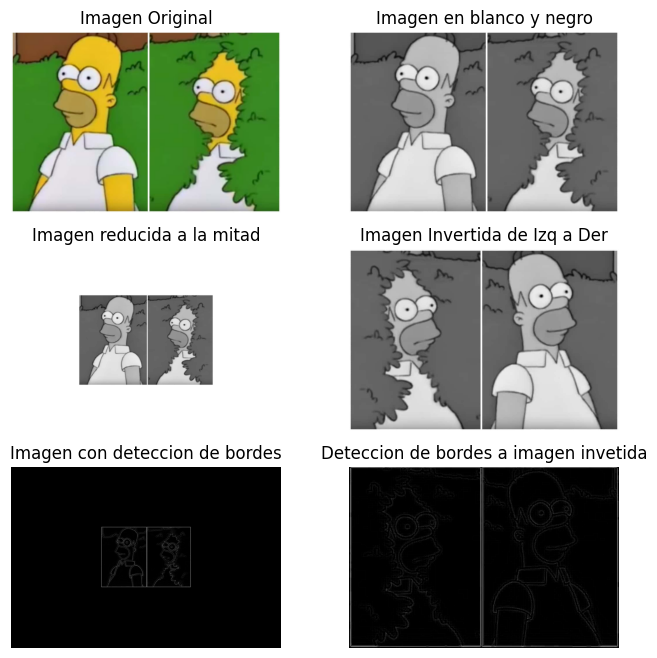

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 8))

axs[0][0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0][0].axis("off")
axs[0][0].set_title('Imagen Original')

axs[0][1].imshow(img2, cmap="gray")
axs[0][1].axis("off")
axs[0][1].set_title('Imagen en blanco y negro')

axs[1][0].imshow(bordered, cmap="gray")
axs[1][0].axis("off")
axs[1][0].set_title('Imagen reducida a la mitad')

axs[1][1].imshow(flipped_image, cmap="gray")
axs[1][1].axis("off")
axs[1][1].set_title('Imagen Invertida de Izq a Der')

axs[2][0].imshow(img_db, cmap="gray")
axs[2][0].axis("off")
axs[2][0].set_title('Imagen con deteccion de bordes')

axs[2][1].imshow(img_dbi, cmap="gray")
axs[2][1].axis("off")
axs[2][1].set_title('Deteccion de bordes a imagen invetida')

# Imprimimos la figura

In [9]:
plt.show()